# Project: Wrangling and Analyze Data

### Table of contents
- Data Gathering
- Assessing Data
 - Visual Assessment
 - Programmatic Assessment
 - Quality Issues
 - Tidines Issues
- Cleaning Data
- Storing Data

In [1]:
# Importing all libraries needed
import pandas as pd
import numpy as np
import requests
import os
import json
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
#Reading the twitter archive data into a pandas DataFrame
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv') 

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# Storing the url into a variable called 'url'
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

In [4]:
# downloading the url file programmatically
response=requests.get(url)

In [5]:
#creating a folder
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [6]:
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [7]:
#Import the tweet image predictions TSV file into a DataFrame and read the file
image_prediction_df = pd.read_csv('image_predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

N/B It was recommended that we create a twitter developer account to access the additional data (tweet_json.txt file), but however because of the timeline in which the project ought to be comleted, I couldn't wait for the twitter developer account to be approved. I therefore decided to proceed by manually downloading the tweet_json.txt file udacity provided as an alternative and it was also stated in the classroom that this approach to access the data will work for me to pass the project equally well.

In [8]:
#Reading the json-txt file manually
with open('tweet-json.txt', 'r') as file:
    lines = file.readlines()

In [9]:
#Loading the data
id_list = []
retweet_list = []
fav_list = []

for line in lines:
    line_json = json.loads(line)
    id_list.append(line_json['id_str'])
    retweet_list.append(line_json['retweet_count'])
    fav_list.append(line_json['favorite_count'])

In [10]:
print(len(id_list), len(retweet_list),len(fav_list))

2354 2354 2354


In [11]:
tweet_dic = {
    'tweet_id': id_list,
    'retweet_count':retweet_list,
    'favorite_count': fav_list
}
tweet_df = pd.DataFrame.from_dict(tweet_dic)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [12]:
#This returns the first five rows of the dataset
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [13]:
twitter_archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [14]:
# this displays a concise summary of the dataframe,
# including the number of missing values in each column
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [15]:
#This returns object containing counts of unique values
twitter_archive.name.value_counts()

None              745
a                  55
Charlie            12
Oliver             11
Lucy               11
Cooper             11
Lola               10
Penny              10
Tucker             10
Winston             9
Bo                  9
Sadie               8
the                 8
Toby                7
Daisy               7
Bailey              7
an                  7
Buddy               7
Jack                6
Rusty               6
Dave                6
Oscar               6
Koda                6
Bella               6
Scout               6
Stanley             6
Milo                6
Leo                 6
Jax                 6
Phil                5
                 ... 
Michelangelope      1
Aldrick             1
Andy                1
Kingsley            1
Adele               1
Yoda                1
Boston              1
Samsom              1
Socks               1
Lilli               1
Bluebert            1
Joey                1
Hector              1
Hero                1
Enchilada 

In [16]:
twitter_archive.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
338,832369877331693569,NaN,NaN,2017-02-16 23:23:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He fell asleep on a heating v...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/832369877...,11,10,Charlie,None,None,None,None


In [17]:
#This returns the last few roles of the dataset
twitter_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [18]:
# this returns the datatypes of the column
twitter_archive['tweet_id'].dtype

dtype('int64')

In [19]:
#This checks for duplicate value
twitter_archive.duplicated().sum()

0

In [20]:
twitter_archive['timestamp'].dtype

dtype('O')

In [21]:
twitter_archive.source.sample(2)

1037    <a href="http://twitter.com/download/iphone" r...
225     <a href="http://twitter.com/download/iphone" r...
Name: source, dtype: object

In [22]:
image_prediction_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [23]:
image_prediction_df.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [24]:
image_prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [25]:
tweet_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [26]:
tweet_df.tail()

,tweet_id,retweet_count,favorite_count
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


In [27]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


In [28]:
tweet_df.describe()

,retweet_count,favorite_count
count,2354.000000,2354.000000
mean,3164.797366,8080.968564
std,5284.770364,11814.771334
min,0.000000,0.000000
25%,624.500000,1415.000000
50%,1473.500000,3603.500000
75%,3652.000000,10122.250000
max,79515.000000,132810.000000


### Quality issues
1. Invalid names in name column of twitter archive dataset

2. Timestamp is in string format

3. Several columns have NaN

4. There are some decimal ratings in rating_numerator

5. Total observation in archive is 2356 which is more than that of image_prediction(2075) and tweet_df (2331)

6. There are some columns like retweeted_status_id, retweeted_status_user_id,retweeted_status_timestamp not needed because we are only interested in original tweets

7. Tweet_id is an int instead of string

8. Tag present instead of source name in source column

9. Url is added to the text in the text column even as there is a separate column for Url

### Tidiness issues
1. we ought to have one table for this dataset, hence tweet_df, image_prediction_df should be part of the twitter_archive

2. There are some rows with multiple dog stages and also four different column for dog 'stages' (doggo, pupper, puppo, floofer) instead of one column

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [29]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
img_pred_clean = image_prediction_df.copy()
tweet_df_clean = tweet_df.copy()

### Issue #1:

#### Define:
convert tweet_id in twitter_archive_clean and img_pred_clean dataset to string

#### Code

In [30]:
# converting tweet_id to a string
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str)

In [31]:
# converting tweet_id to a string
img_pred_clean['tweet_id'] = img_pred_clean['tweet_id'].astype(str)

#### Test

In [32]:
#checking to see if coverted
type(twitter_archive_clean.tweet_id[0])

str

In [33]:
#checking to see if coverted
type(img_pred_clean.tweet_id[0])

str

In [34]:
type(tweet_df_clean.tweet_id[0])

str

### Issue #2:

#### Define
Convert the  datatype of timestamp column to timestamp

#### Code

In [35]:
# Converting datatype of timestamp column to timestamp
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive.timestamp)

#### Test

In [36]:
# check if datatype timestamp column is timestamp
assert type(twitter_archive_clean.timestamp[0]) is pd.Timestamp

### Issue #3

#### Define
We only want only original tweets, so we filter out retweets and replies.

#### Code

In [37]:
#Remove the rows containing the retweets
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_user_id.isnull()]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_timestamp.isnull()]

#### Test

In [38]:
# check if we still have retweets
twitter_archive_clean[~twitter_archive_clean.retweeted_status_id.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [39]:
twitter_archive_clean[~twitter_archive_clean.retweeted_status_user_id.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [40]:
twitter_archive_clean[~twitter_archive_clean.retweeted_status_timestamp.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #4:

#### Define
drop unnecessary columns from twitter_archive

#### Code

In [41]:
#dropping unnecessary columns from twitter_archive
twitter_archive_clean.drop(columns =['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp','expanded_urls'], inplace = True)

#### Test
Checking if columns have been dropped

In [42]:
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Issue #6

#### Define
There are some decimal ratings in rating numerator that needs to be extracted

#### Code

In [43]:
#xtracting the decimal ratings in rating_numerators with regular expressions:
twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5
695,"This is Logan, the Chow who lived. He solemnly...",75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27
1689,I've been told there's a slight possibility he...,5
1712,Here we have uncovered an entire battalion of ...,26


### Issue #5

#### Define
Melt 'doggo', 'floofer', 'pupper', 'puppo' column into dog_stage column

In [44]:
# Before melting
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None


#### Code

In [45]:
# handle none
twitter_archive_clean.doggo.replace('None', '', inplace=True)
twitter_archive_clean.floofer.replace('None', '', inplace=True)
twitter_archive_clean.pupper.replace('None', '', inplace=True)
twitter_archive_clean.puppo.replace('None', '', inplace=True)

# merge into column
twitter_archive_clean['dog_stage'] = twitter_archive_clean.doggo + twitter_archive_clean.floofer + twitter_archive_clean.pupper + twitter_archive_clean.puppo

# handle multiple stages
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

# handle missing values
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == '', 'dog_stage'] = np.nan

In [46]:
twitter_archive_clean = twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

In [47]:
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage'],
      dtype='object')

#### Test

In [48]:
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage'],
      dtype='object')

In [49]:
print(twitter_archive_clean.dog_stage.value_counts())
print(len(twitter_archive_clean))

pupper            224
doggo              75
puppo              24
doggo, pupper      10
floofer             9
doggo, floofer      1
doggo, puppo        1
Name: dog_stage, dtype: int64
2175


### Issue #6

#### Define
merge the three datasets together, joining on tweet_id

#### Code

In [50]:
#We are merging our dataframes
master_df = pd.merge(twitter_archive_clean, img_pred_clean, how = 'left', on = ['tweet_id'] )
master_df = pd.merge(master_df, tweet_df_clean, how = 'left', on = ['tweet_id'])


#### Test

In [51]:
master_df.head(2)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819


In [52]:
master_df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'retweet_count', 'favorite_count'],
      dtype='object')

### Issue #7

#### Define
Replace Doubtful names with None

#### Code

In [53]:
# Replace Doubtful names such as: a, an, all, the, mad, his, such, quite, not, one 
# (the names starting with lower case are not the real names) with None
master_df.name = master_df.name.apply(lambda x : 'None' if x[0].islower() else x)

#### Test

In [54]:
# Check the lowercase names are removed
assert master_df.name.apply(lambda x : x[0].isupper()).all()

### Issue #8

#### Define
replace the tags with actual source

#### Code

In [55]:
# replace the tags with actual source using regex
master_df.source = master_df.source.apply(lambda x : re.findall('[A-Z][a-zA-Z\s]*', x)[0])

#### Test

In [56]:
 # Unique values and counts of source after replace
master_df.source.value_counts()

Twitter for iPhone    2042
Vine                    91
Twitter Web Client      31
TweetDeck               11
Name: source, dtype: int64

### Issue #9

#### Define
- Remove url for the tweet from the text column, as the url is already present in expanded_urls column 
- Convert the html ampersand code from "&amp ;" to "&" in the text column
- Replace the "/n" the newline symbol with " "

In [57]:
# replace the url with empty "" using regex
master_df['text'] =master_df.text.apply(lambda x : re.sub('http\S+','', x).strip())

# Replace &amp with &
master_df['text'] = master_df.text.str.replace("&amp;", "&")

# Replace \n with ' '
master_df['text'] = master_df.text.str.replace("\n", " ")

#### Test

In [58]:
# text after removing url
master_df[['tweet_id','text']].sample(5)

,tweet_id,text
1980,669571471778410496,This is Keith. He's had 13 DUIs. 7/10 that's t...
824,748220828303695873,Stop what you're doing and watch this heckin m...
1499,682047327939461121,We normally don't rate bears but this one seem...
650,772117678702071809,Meet Jack. He's a Clemson pup. Appears to be r...
238,840268004936019968,This is Monty. He makes instantly regrettable ...


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [59]:
master_df.to_csv('twitter_archive_master.csv', index = False)

In [60]:
df = pd.read_csv('twitter_archive_master.csv')

In [61]:
df.head(2)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 21 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
dog_stage             344 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null object
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null object
retweet_count         2175 non-null int64
favorite_count        2175 non-nul

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Question 1: Most source of the tweet

In [63]:
df.source.value_counts()

Twitter for iPhone    2042
Vine                    91
Twitter Web Client      31
TweetDeck               11
Name: source, dtype: int64

### Question 2: Is there a correlation between favourite counts and the number of retweets a post gets

In [64]:
df[['retweet_count', 'favorite_count']].corr()

,retweet_count,favorite_count
retweet_count,1.000000,0.911732
favorite_count,0.911732,1.000000


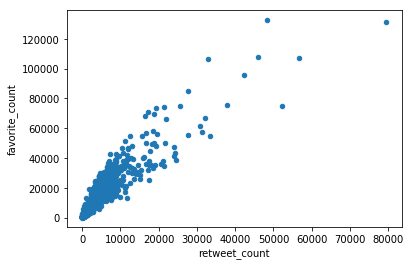

In [65]:
df.plot(x = 'retweet_count', y = 'favorite_count', kind = 'scatter');

### Question 3: What is the average rating_numerator

In [66]:
df.rating_numerator.describe()

count    2175.000000
mean       13.215172
std        47.725696
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

### Insights:
1. Most source of the tweet is Twitter for iPhone

2. There is a strong positive correlation between favorite_count and retweet_count i.e a linear relationship between the retweet counts and the favorite counts

3. The average rating numerator is 13.22 (to 2dp)

### Visualization

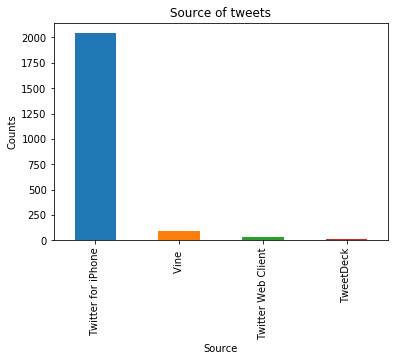

In [67]:
df['source'].value_counts().plot(kind = 'bar');
plt.title('Source of tweets')
plt.ylabel('Counts')
plt.xlabel('Source');